In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf',random_state=4)
svm.fit(X_train,y_train)

y_pred_svm = svm.decision_function(X_test)
#Normally we use the predict function but for plotting the ROC-AUC curve 
#We need to use decision function

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred_logistic = model.decision_function(X_test)

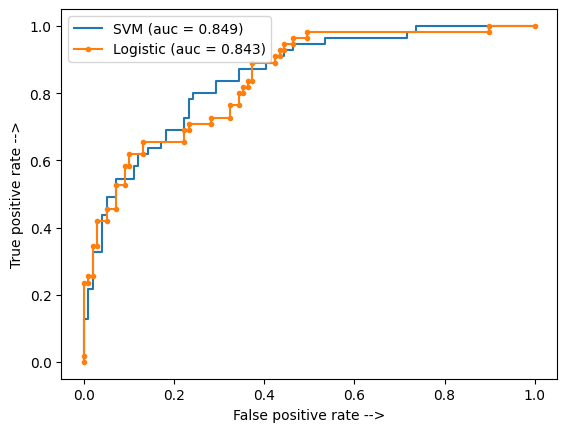

In [10]:
from sklearn.metrics import roc_curve, auc

log_fpr, log_tpr, threshold = roc_curve(y_test,y_pred_logistic)
auc_log = auc(log_fpr, log_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr,svm_tpr)

plt.Figure(figsize=(5,5),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(log_fpr,log_tpr, marker='.',label='Logistic (auc = %0.3f)' % auc_log)

plt.xlabel('False positive rate -->')
plt.ylabel('True positive rate -->')

plt.legend()
plt.show()